In [1]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

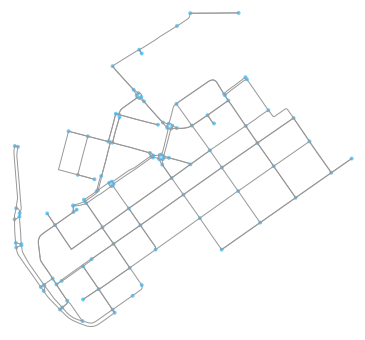

In [2]:
place_name = "Kamppi, Helsinki, Finland"
graph = ox.graph_from_place(place_name, network_type='drive')
fig, ax = ox.plot_graph(graph)

In [3]:
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
print(edges.columns)
print(edges.crs)
edges.head()

Index(['u', 'v', 'key', 'osmid', 'oneway', 'lanes', 'name', 'highway',
       'maxspeed', 'length', 'geometry', 'junction', 'bridge', 'access'],
      dtype='object')
+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs +type=crs


,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,junction,bridge,access
0,25216594,1372425714,0,23856784,True,2,Mechelininkatu,primary,40,40.885,"LINESTRING (24.92106 60.16479, 24.92095 60.164...",NaN,NaN,NaN
1,25238874,1372425713,0,"[29977177, 30470347]",True,3,Mechelininkatu,primary,40,16.601,"LINESTRING (24.92103 60.16366, 24.92104 60.163...",NaN,NaN,NaN
2,25238944,25216594,0,"[372440330, 8135861]",True,2,NaN,primary,40,25.190,"LINESTRING (24.92129 60.16463, 24.92127 60.164...",NaN,NaN,NaN
3,25238944,319896278,0,"[25514547, 677423564, 30288797, 30288799]",True,"[3, 2]",Mechelininkatu,primary,40,242.476,"LINESTRING (24.92129 60.16463, 24.92136 60.164...",NaN,NaN,NaN
4,25291537,25291591,0,"[30568275, 36729015, 316590744, 316590745, 316...",True,NaN,Fredrikinkatu,tertiary,30,139.090,"LINESTRING (24.93702 60.16433, 24.93700 60.164...",NaN,NaN,NaN


In [4]:
print(edges['highway'].value_counts())

residential      112
tertiary          78
primary           26
secondary         17
unclassified      11
living_street      4
primary_link       1
Name: highway, dtype: int64


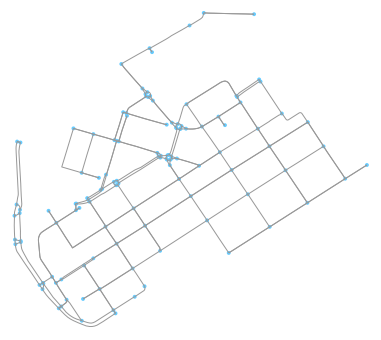

In [5]:
graph_proj = ox.project_graph(graph)
fig, ax = ox.plot_graph(graph_proj)

In [6]:
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [7]:
edges_proj.head()

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,junction,bridge,access
0,25216594,1372425714,0,23856784,True,2,Mechelininkatu,primary,40,40.885,"LINESTRING (384631.322 6671580.071, 384624.750...",NaN,NaN,NaN
1,25238874,1372425713,0,"[29977177, 30470347]",True,3,Mechelininkatu,primary,40,16.601,"LINESTRING (384625.787 6671454.380, 384626.281...",NaN,NaN,NaN
2,25238944,25216594,0,"[372440330, 8135861]",True,2,NaN,primary,40,25.190,"LINESTRING (384643.473 6671561.534, 384643.045...",NaN,NaN,NaN
3,25238944,319896278,0,"[25514547, 677423564, 30288797, 30288799]",True,"[3, 2]",Mechelininkatu,primary,40,242.476,"LINESTRING (384643.473 6671561.534, 384648.006...",NaN,NaN,NaN
4,25291537,25291591,0,"[30568275, 36729015, 316590744, 316590745, 316...",True,NaN,Fredrikinkatu,tertiary,30,139.090,"LINESTRING (385515.553 6671500.134, 385514.557...",NaN,NaN,NaN


# Analyzing the network properties

In [8]:
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

{'n': 124,
 'm': 249,
 'k_avg': 4.016129032258065,
 'intersection_count': 116,
 'streets_per_node_avg': 3.217741935483871,
 'streets_per_node_counts': {0: 0, 1: 8, 2: 1, 3: 71, 4: 44},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06451612903225806,
  2: 0.008064516129032258,
  3: 0.5725806451612904,
  4: 0.3548387096774194},
 'edge_length_total': 19967.508000000005,
 'edge_length_avg': 80.19079518072292,
 'street_length_total': 13658.883000000002,
 'street_length_avg': 74.6387049180328,
 'street_segments_count': 183,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 1.0244035406832668,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

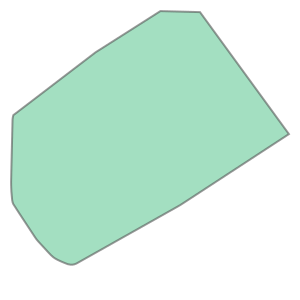

In [9]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull
# Show output
convex_hull

In [10]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value

# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

n                                                                                    124
m                                                                                    249
k_avg                                                                            4.01613
intersection_count                                                                   116
streets_per_node_avg                                                             3.21774
streets_per_node_counts                                 {0: 0, 1: 8, 2: 1, 3: 71, 4: 44}
streets_per_node_proportion            {0: 0.0, 1: 0.06451612903225806, 2: 0.00806451...
edge_length_total                                                                19967.5
edge_length_avg                                                                  80.1908
street_length_total                                                              13658.9
street_length_avg                                                                74.6387
street_segments_count

# Shortest path analysis

In [11]:
# Centroid
centroid = convex_hull.centroid

# Show
print(centroid)

POINT (385170.0891607622 6671717.293203074)


In [12]:
nodes_proj.head()

,y,x,osmid,highway,lon,lat,geometry
25216594,6.671580e+06,384631.322372,25216594,NaN,24.921057,60.164794,POINT (384631.322 6671580.071)
25238874,6.671454e+06,384625.787221,25238874,NaN,24.921028,60.163665,POINT (384625.787 6671454.380)
25238944,6.671562e+06,384643.473274,25238944,NaN,24.921286,60.164631,POINT (384643.473 6671561.534)
25291537,6.671500e+06,385515.553244,25291537,NaN,24.937023,60.164325,POINT (385515.553 6671500.134)
25291564,6.671673e+06,385779.207015,25291564,NaN,24.941674,60.165948,POINT (385779.207 6671672.709)


In [13]:
nodes_proj['x'] = nodes_proj["x"].astype(float)
maxx = nodes_proj['x'].max()
print(maxx)

385855.03009928943


In [14]:
target = nodes_proj.loc[nodes_proj['x']==maxx, 'geometry'].values[0]
print(target)

POINT (385855.0300992894 6671721.810323974)


In [15]:
# Get origin x and y coordinates
orig_xy = (centroid.y, centroid.x)

# Get target x and y coordinates
target_xy = (target.y, target.x)

In [16]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node

301360197

In [17]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node

317703609

In [18]:
# Retrieve the rows from the nodes GeoDataFrame
o_closest = nodes_proj.loc[orig_node]
t_closest = nodes_proj.loc[target_node]

In [19]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

,y,x,osmid,highway,lon,lat,geometry
301360197,6.671721e+06,385166.707932,301360197,NaN,24.930617,60.166212,POINT (385166.708 6671721.244)
317703609,6.671722e+06,385855.030099,317703609,traffic_signals,24.943012,60.166410,POINT (385855.030 6671721.810)


In [20]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')

# Show what we have
print(route)

[301360197, 1372441183, 1372441170, 60170471, 1377211668, 1377211666, 25291565, 25291564, 317703609]


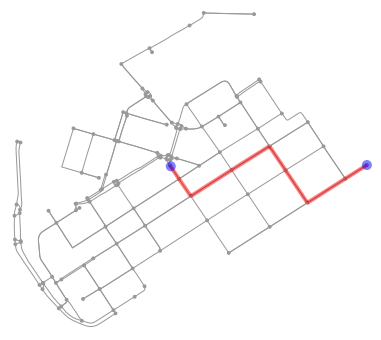

In [22]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route, origin_point=orig_xy, destination_point=target_xy)

In [23]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]
route_nodes

,y,x,osmid,highway,lon,lat,geometry
301360197,6.671721e+06,385166.707932,301360197,NaN,24.930617,60.166212,POINT (385166.708 6671721.244)
1372441183,6.671672e+06,385199.040423,1372441183,NaN,24.931227,60.165777,POINT (385199.040 6671671.820)
1372441170,6.671610e+06,385239.956998,1372441170,NaN,24.931999,60.165235,POINT (385239.957 6671610.080)
60170471,6.671704e+06,385382.616738,60170471,NaN,24.934515,60.166117,POINT (385382.617 6671703.996)
1377211668,6.671789e+06,385514.573340,1377211668,NaN,24.936843,60.166917,POINT (385514.573 6671789.024)
1377211666,6.671703e+06,385570.886277,1377211666,NaN,24.937906,60.166160,POINT (385570.886 6671702.892)
25291565,6.671586e+06,385647.124210,25291565,traffic_signals,24.939344,60.165135,POINT (385647.124 6671586.216)
25291564,6.671673e+06,385779.207015,25291564,NaN,24.941674,60.165948,POINT (385779.207 6671672.709)
317703609,6.671722e+06,385855.030099,317703609,traffic_signals,24.943012,60.166410,POINT (385855.030 6671721.810)


In [25]:
from shapely.geometry import LineString, Point

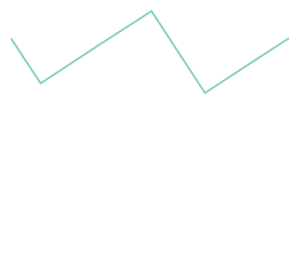

In [26]:
# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

In [27]:
# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

# Add a list of osmids associated with the route
route_geom.loc[0, 'osmids'] = str(list(route_nodes['osmid'].values))

# Calculate the route length
route_geom['length_m'] = route_geom.length

route_geom.head()

,geometry,osmids,length_m
0,"LINESTRING (385166.708 6671721.244, 385199.040...","[301360197, 1372441183, 1372441170, 60170471, ...",951.40388


In [28]:
# Retrieve buildings and reproject
buildings = ox.footprints_from_place(place_name)
buildings_proj = buildings.to_crs(crs=edges_proj.crs)

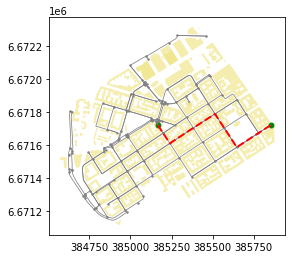

In [29]:
# Plot edges and nodes
ax = edges_proj.plot(linewidth=0.75, color='gray')
ax = nodes_proj.plot(ax=ax, markersize=2, color='gray')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='khaki', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=24, color='green')